1.6666666666666667
-218.33333333333331
1.0
-103


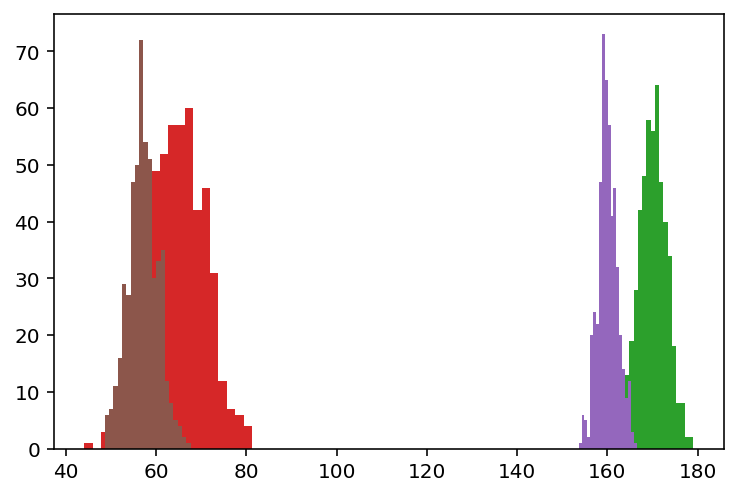

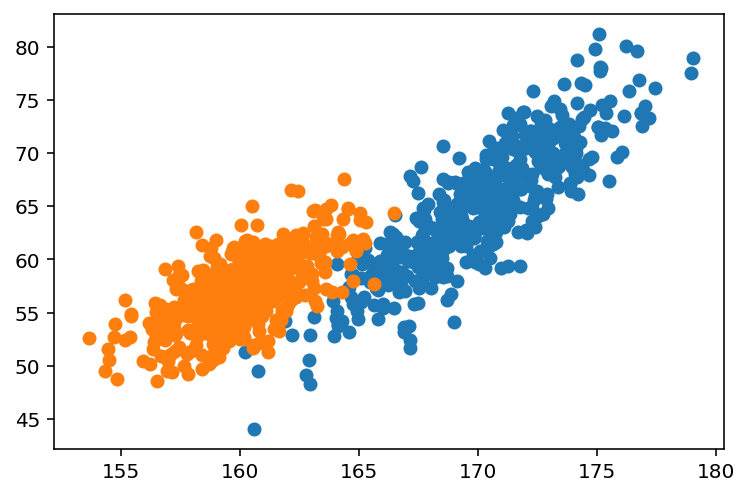

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# data generation
# 키, 몸무게
n = 500
x1 = np.random.randn(n)*3.0 + 170
x2 = np.random.randn(n)*2.0 + 160

plt.hist(x1, bins=20)
plt.hist(x2, bins=20)
a1 = (10./6.) ; print(a1)
b1 = (60-10*167/6.); print(b1)
a2 = 1.0 ; print(a2)
b2 = 62 - 165 ; print(b2)

y1 = a1*x1 + b1 + np.random.randn(n)*3.0
y2 = a2*x2 + b2 + np.random.randn(n)*2.5
plt.hist(x1, bins=20)
plt.hist(y1, bins=20)
plt.hist(x2, bins=20)
plt.hist(y2, bins=20)
plt.show()
plt.scatter(x1,y1)
# plt.show()
plt.scatter(x2,y2)
plt.show()

0.7524744055924463


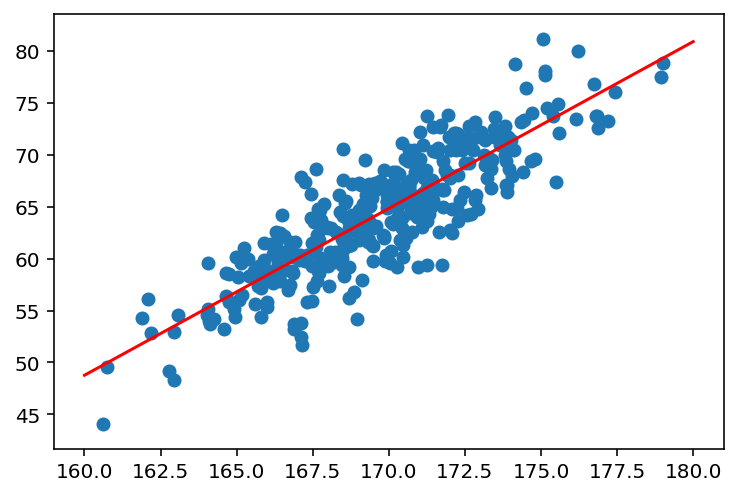

In [376]:
from sklearn.model_selection import train_test_split
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(x1,y1) # 75%
# 남성 키 --> 몸무게 예측: M1
from sklearn.linear_model import LinearRegression
M1 = LinearRegression() # (1) 모델 구조 선택
M1.fit(X_train.reshape(-1, 1),y_train) # (2) 학습 수행
print(M1.score(X_test.reshape(-1, 1), y_test)) # (3) 모델 사용후 채점 R-square

w1, b1 = M1.coef_, M1.intercept_
xs = np.linspace(160,180,2) # fitting 라인 그리기
plt.plot(xs, w1*xs + b1, c='r')
plt.scatter(X_train,y_train)

In [394]:
z = np.arange(10)
# np.random.seed(999)
a,b = train_test_split(z, test_size=0.3, random_state=999) # 훈련용은 70%
a,b

(array([4, 3, 7, 9, 1, 5, 0]), array([6, 2, 8]))

In [407]:
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(x2,y2) # 75%
M2 = LinearRegression() # (1) 모델 구조 선택
M2.fit(X_train.reshape(-1, 1),y_train) # (2) 학습 수행
print(M2.score(X_test.reshape(-1, 1), y_test)) # (3) 모델 사용후 채점 R-square


0.43499434849229446


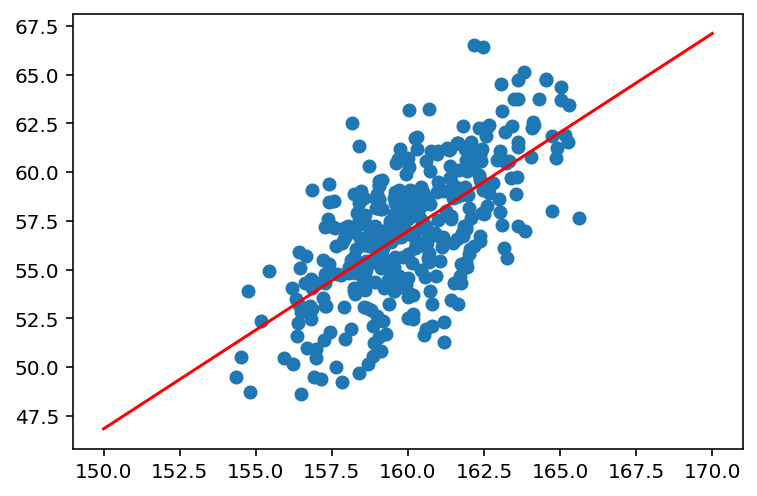

In [408]:
w1, b1 = M2.coef_, M2.intercept_
xs = np.linspace(150,170,2) # fitting 라인 그리기
plt.plot(xs, w1*xs + b1, c='r')
# plt.scatter(x1,y1)
plt.scatter(X_train,y_train)

In [420]:
x = np.hstack((x1,x2))
y = np.hstack((y1,y2))

np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(x,y) # 75%
M3 = LinearRegression() # (1) 모델 구조 선택
M3.fit(X_train.reshape(-1, 1),y_train) # (2) 학습 수행
print(M3.score(X_test.reshape(-1, 1), y_test)) # (3) 모델 사용후 채점 R-square


0.7131008723862964


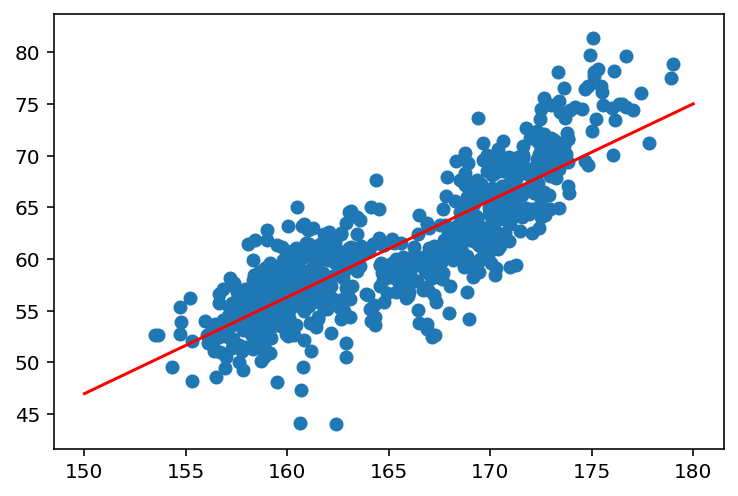

In [350]:
w1, b1 = M3.coef_, M3.intercept_
xs = np.linspace(150,180,2) # fitting 라인 그리기
plt.plot(xs, w1*xs + b1, c='r')
# plt.scatter(x1,y1)
plt.scatter(X_train, y_train)

In [460]:
z= np.vstack((x, y)) # 수직으로 합치기
P = z.T
# 남성 0, 여성 1
s = n * [0] + n * [1]
df =pd.DataFrame(P, columns=[['height', 'weight']])
df['sex'] = s

y = df[['weight']]   # 데이터프레임을 편리하게 사용
X = df[["height", "sex"]]
# y = df.values[:,1]  # ndarray로 직접 처리, 속도가 빠르다
# X = df.values[:,(0,2)]
np.random.seed(999)
X_train, X_test, y_train, y_test = train_test_split(X,y) # 75%
M4 = LinearRegression() # (1) 모델 구조 선택
M4.fit(X_train,y_train) # (2) 학습 수행
print(M4.score(X_test, y_test)) # (3) 모델 사용후 채점 R-square


0.7931008696885007


In [461]:
X

,height,sex
0,173.399590,0
1,172.872391,0
2,172.257362,0
3,172.310400,0
4,172.466556,0
...,...,...
995,162.348201,1
996,156.231814,1
997,161.075148,1
998,159.405204,1


In [459]:
df[["height","sex"]] # [ 인덱싱, 리스트

,height,sex
0,173.399590,0
1,172.872391,0
2,172.257362,0
3,172.310400,0
4,172.466556,0
...,...,...
995,162.348201,1
996,156.231814,1
997,161.075148,1
998,159.405204,1


(1000, 2)


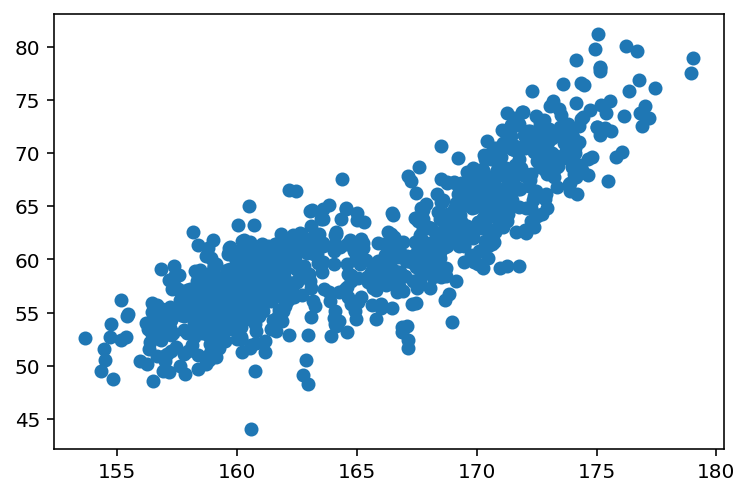

In [421]:
plt.scatter(x, y)

In [27]:
np.hstack((x.round(0), y.round(0))) # 수평으로 합치기

array([170., 172., 169., 170., 167.,  66.,  68.,  63.,  64.,  59.])